In [2]:
import numpy as np
import matplotlib.pyplot as plt

# GENERATING OUR OWN DATASET

## Sample Dataset Generation

In [5]:
mean = [2,2]
cov = [[3,  -0.5],
       [-0.5, 4]]
dist = np.random.multivariate_normal(mean, cov, 500)

print(dist.shape)

(500, 2)


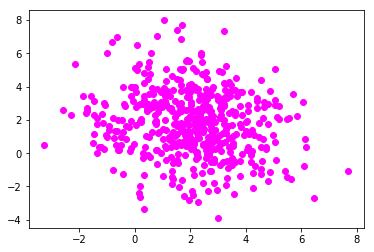

In [7]:
plt.figure()
plt.scatter(dist[:,0], dist[:,1],color="magenta")
plt.show()

## Dataset for KNN

In [8]:
mean_01 = [4,2]
cov_01 = [[1,  0.5],
         [0.5, 1]]
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)

mean_02 = [1,3]
cov_02 = [[1.3,  -0.3],
         [-0.3, 1.5]]
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


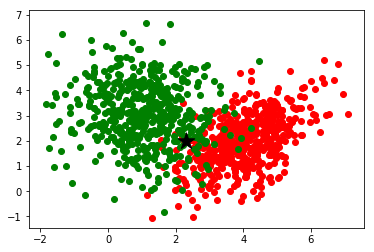

In [10]:
plt.figure()
plt.scatter(dist_01[:,0], dist_01[:,1], color='red')
plt.scatter(dist_02[:,0], dist_02[:,1], color='green')
plt.scatter(2.3, 2, color='black', marker='*', s=300)
plt.show()

In [11]:
# Creating the dataset of size of both distributions 
rows = dist_01.shape[0] + dist_02.shape[0]
columns = dist_01.shape[1] + 1 # extra columns for labels

dataset = np.zeros((rows, columns))
dataset.shape

(1000, 3)

In [13]:
# Combining distributions
dataset[:dist_01.shape[0], :-1] = dist_01
dataset[dist_01.shape[0]:, :-1] = dist_02

# Assigning labels
dataset[:dist_01.shape[0], -1] = 0 # Redundant, as it is already assigned to zero
dataset[dist_01.shape[0]:, -1] = 1

In [14]:
# Shuffling the dataset
np.random.shuffle(dataset) #Shuffling is important because while dividing out dataset into training and testing data
                           # it will not take all the test point from same distributions thats why it is important

In [15]:
# After Shuffling how our dataset look 
dataset[490:510]

array([[-2.80191717e-01,  2.60664617e+00,  1.00000000e+00],
       [ 2.94916739e+00,  1.20339377e+00,  0.00000000e+00],
       [ 4.03894285e+00,  1.96401217e+00,  0.00000000e+00],
       [-5.76476217e-01,  3.41125151e+00,  1.00000000e+00],
       [ 5.15154324e-03,  3.84725781e+00,  1.00000000e+00],
       [ 3.85194648e+00,  2.57145412e+00,  0.00000000e+00],
       [ 4.78773488e+00,  3.61982527e+00,  0.00000000e+00],
       [ 5.56358527e+00,  3.24650051e+00,  0.00000000e+00],
       [ 1.80724576e+00,  1.56037301e+00,  1.00000000e+00],
       [-1.09821798e+00,  2.34993747e+00,  1.00000000e+00],
       [ 1.41722065e+00,  3.52598173e+00,  1.00000000e+00],
       [ 3.92249225e+00,  1.11879575e+00,  0.00000000e+00],
       [ 1.56130587e+00,  3.90524712e+00,  1.00000000e+00],
       [ 4.09583292e+00,  2.75436439e+00,  0.00000000e+00],
       [ 5.20235743e+00,  7.61176087e-01,  0.00000000e+00],
       [ 2.75392436e+00,  1.28720415e+00,  0.00000000e+00],
       [-1.76897335e+00,  5.43680221e+00

## Splitting into training and testing datasets

In [16]:
split = int(0.8 * dataset.shape[0])

X_train = dataset[:split, :-1]
X_test = dataset[split:, :-1]

y_train = dataset[:split, -1]
y_test = dataset[split:, -1]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(800, 2) (800,) (200, 2) (200,)


# K Nearest Neighbors

## KNN Problem Statement

In [18]:
TP = np.array([-1.5, 5.2])  #test point ,you can change this on your own will

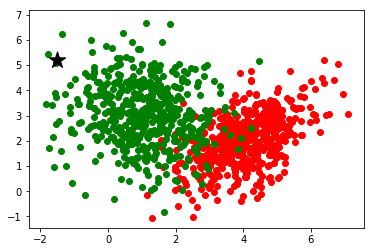

In [19]:
plt.figure()
plt.scatter(dist_01[:,0], dist_01[:,1], color='red')
plt.scatter(dist_02[:,0], dist_02[:,1], color='green')
plt.scatter(TP[0], TP[1], color='black', marker='*', s=300)
plt.show()

## Implementing KNN

In [21]:
def euclidean(a1, a2):    # we are using euclidean distance in KNN you canyou any other 
    return np.sqrt(np.sum((a1 - a2) ** 2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

In [23]:
X_train[0], y_train[0]    # just an ramdon point and its value 

(array([2.26916893, 2.87897592]), 1.0)

In [24]:
def knn(X_train, y_train, test_point, k=5):
    
    distances = []
    
    # 1) Compute distances using euclidean
    for data_point, label in zip(X_train, y_train):
        distance = euclidean(test_point, data_point)
        distances.append((distance, label))
        
    # 2) Sort distances on the basis of its distance
    distances = sorted(distances, key=lambda x: x[0])
    
    # 3) Choose k nearest neighbors in this case i have choosen its value to be 5
    k_nearest_neighbors = np.array(distances[:k])  
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    
    # 4) Decide (Majority Voting)
    verdict = labels[counts.argmax()]
    return verdict

In [26]:
def get_predictions(X_train, y_train, X_test, k=5): 
    predictions = []
    
    for test_point in X_test:
        pred = knn(X_train, y_train, test_point, k)
        predictions.append(pred)
        
    return np.array(predictions)

In [27]:
def calculate_accuracy(predictions, true_labels):          
    return (predictions == true_labels).sum() / true_labels.shape[0]

In [28]:
knn(X_train, y_train, TP)

1.0

In [30]:
predictions = get_predictions(X_train, y_train, X_test)
print(predictions)
calculate_accuracy(predictions, y_test)

[0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 1. 1.]


0.955